## Reaction Bench: Lesson 1

### Part 1:

In this lesson I will be taking you through how our reaction bench environment works and how an RL agent might interact with the environment.

The reaction bench environment is meant to as it sounds simulate a reaction, in most reaction benches the agent will have a number of reagents and the ability to play with the environmental conditions of the reaction and through doing this the agent is trying to maximize the yield of a certain desired material. For the reaction bench we use a reaction file which specifies the mechanics of a certain reaction or multiple reactions. For instance the Wurtz reaction is made up of 6 different reactions and as such is a very complicated reaction which the agent has to try and learn the mechanisms of the reaction environment it is in. For this lesson we will be using a simplified version of the wurtz reaction to introduce you to how actions affect the environment.

Below is just some simple code that loads our desired environment

In [ ]:
%matplotlib inline

In [1]:
import sys
sys.path.append('../')
sys.path.append('../chemistrylab/reactions')
import gym
import chemistrylab
import numpy as np
from gym import envs
all_envs = envs.registry.all()
env_ids = [env_spec.id for env_spec in all_envs if 'React' in env_spec.id]
print(env_ids)
env = gym.make('WurtzReact_overlap-v0')
render_mode = "human"
action_set = ['Temperature', 'Volume', "1-chlorohexane", "2-chlorohexane", "3-chlorohexane", "Na"]

assert len(action_set) == env.action_space.shape[0]

['WurtzReact-v0', 'WurtzReact_overlap-v0', 'DecompReactLesson-v0']


Firtst let's load up the environment, I highly recommend you look at the source code for the reaction bench and
reaction, it should help provide insight into how this all works. Further the lesson on creating a custom reaction
environment will also help give insight into the reaction mechanics. If you run the cell below you will see a graph appear that looks something like this:

![graph](../sample_figures/tutorial/wurtz_overlap_0.png)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


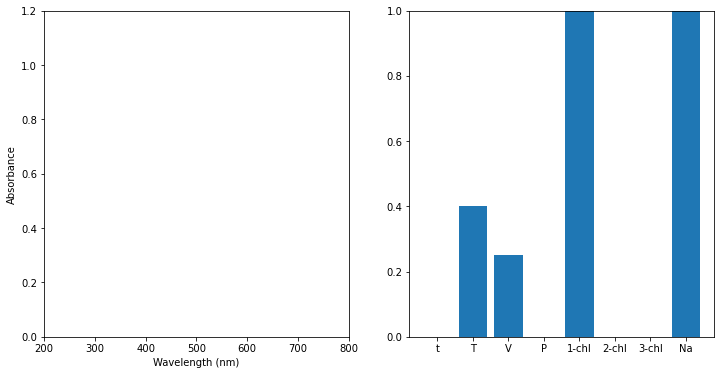

In [10]:
env.reset()
env.render(mode=render_mode)

Understanding the graph above is important to understanding how the agent will have to understand the environment.
On the left we can see the absorbance spectra of the materials in our reaction vessel, and on the right we have
a relative scale of a number of important metrics. From left to right we have time passed, temperature, volume (solvent)
, presure, and the quantity of reagents that we have available to use. All of this data is what the RL agent has inorder
for it to try and optimize the reaction pathway. 

The reaction we are using is as follows:

2 1-chlorohexane + 2 Na --> dodecane + 2 NaCl

This reaction is performed in an aqueous state with ethoxyethane as the solvent.

With all that out of the way let's focus our attention to the action space. For this reaction environemnt our action
space is represented by a 6 element vector. 

|              | Temperature | Volume | 1-chlorohexane | 2-chlorohexane | 3-chlorohexane | Na  |
|--------------|-------------|--------|----------------|----------------|----------------|-----|
| Value range: | 0-1         | 0-1    | 0-1            | 0-1            | 0-1            | 0-1 |

As you might have noticed now, the reaction bench environment deals with a continuous action space. So what exactly do
these continuous values represent? For the environmental conditions, in this case Volume and Temperature 0 represents a
decrease in temperature  or volume by dT or dV (specified in the reaction bench), 1/2 represents no change, and
1 represents an increase by dT or dV. For the chemicals, 0 represents adding no amount of that chemical to the reaction
vessel, and 1 represents adding all of the originally available chemical (there is a negative reward if you try to add
more chemical than is available). 

Below you will find a code cell that will allow you to interact with the gym environment, I highly encourage you to play around with different actions and to not the rewards as well.

1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


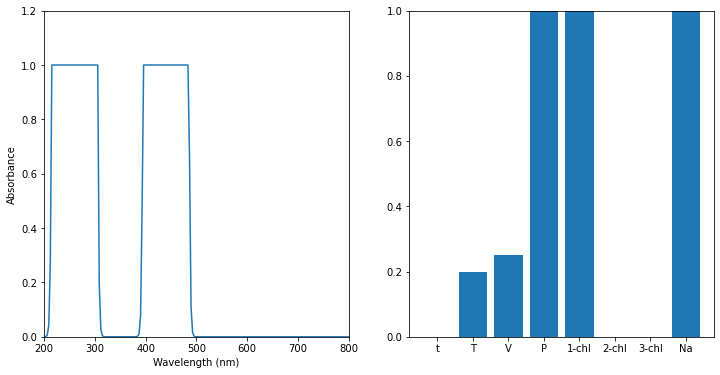

--------------------
Temperature: 1
Volume: 0.5
1-chlorohexane: 1
2-chlorohexane: 0
3-chlorohexane: 0
Na: 1


../chemistrylab/reactions/wurtz_reaction.py:344: RuntimeWarning: invalid value encountered in double_scalars
  P_total += self.n[i] * R * T / V
../chemistrylab/reactions/wurtz_reaction.py:288: RuntimeWarning: invalid value encountered in double_scalars
  self.rate[1] = k2 * (C[0] ** 1) * (C[1] ** 1) * (C[2] ** 0) * (C[3] ** 1)
../chemistrylab/reactions/wurtz_reaction.py:289: RuntimeWarning: invalid value encountered in double_scalars
  self.rate[2] = k3 * (C[0] ** 1) * (C[1] ** 0) * (C[2] ** 1) * (C[3] ** 1)
../chemistrylab/reactions/wurtz_reaction.py:290: RuntimeWarning: invalid value encountered in double_scalars
  self.rate[3] = k4 * (C[0] ** 0) * (C[1] ** 1) * (C[2] ** 0) * (C[3] ** 1)
../chemistrylab/reactions/wurtz_reaction.py:291: RuntimeWarning: invalid value encountered in double_scalars
  self.rate[4] = k5 * (C[0] ** 0) * (C[1] ** 1) * (C[2] ** 1) * (C[3] ** 1)
../chemistrylab/reactions/wurtz_reaction.py:292: RuntimeWarning: invalid value encountered in double_scalars
  self.

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
reward: nan
total_reward: nan
--------------------


KeyboardInterrupt: Interrupted by user

In [9]:
done = False
state = env.reset()
total_reward = 0
while not done:
    # print(state)
    env.render(mode=render_mode)
    action = np.zeros(env.action_space.shape[0])
    print('--------------------')
    for i, a in enumerate(action_set):
        action[i] = float(input(f'{a}: '))
    state, reward, done, _ = env.step(action)
    total_reward += reward
    print(f'reward: {reward}')
    print(f'total_reward: {total_reward}')

### Part 2:


Here I will provide instructions on how to maximize the return of this reaction environment.

This is fairly simple for this task and have thus provided some script which demonstrates our strategy, and I encourage
you to try your own strategy and see how it performs. In this case cour strategy is at step 1 to increase the temperature,
keep the volume of solvent constant, and to add all our reagents, in this case 1-chlorohexane and Na. This gives us an
action vector of:

| Temperature | Volume | 1-chlorohexane | 2-chlorohexane | 3-chlorohexane | Na  |
|-------------|--------|----------------|----------------|----------------|-----|
| 1         | 1/2    | 1            | 0            | 0            | 1 |

![image of reaction](https://image1.masterfile.com/getImage/NjQwLTAzMjU4NDA1ZW4uMDAwMDAwMDA=ANb9FF/640-03258405en_Masterfile.jpg)

Then at every next step we are going to keep the solvent volume constant and increase the temperature

| Temperature | Volume | 1-chlorohexane | 2-chlorohexane | 3-chlorohexane | Na  |
|-------------|--------|----------------|----------------|----------------|-----|
| 1         | 1/2    | 0            | 0            | 0            | 0 |

![heating up vessel](https://media.sciencephoto.com/image/c0150431/800wm)

To see this in action simply run the following code cell:

In [ ]:
done = False
state = env.reset()
total_reward = 0
round = 0

while not done:
    # print(state)
    env.render(mode=render_mode)
    action = np.zeros(env.action_space.shape[0])
    if round == 0:
        action[0] = 1
        action[1] = 1
        action[2] = 1
        action[-1] = 1
    else:
        action[0] = 1
        action[1] = 1

    print('--------------------')
    print(round)
    state, reward, done, _ = env.step(action)
    total_reward += reward
    print(f'reward: {reward}')
    print(f'total_reward: {total_reward}')
    round += 1
    if done:
        wait = input("PRESS ENTER TO EXIT")

Now we're done! I hope you have a better sense of how the reaction environment works and the process through which
an RL agent must go through to learn the environment.